# Standard Deviation

Date published: 2018-11-30

Category: Math

Subcategory: Descriptive Statistics

Tags: standard deviation, normal distribution, python, pandas


**Standard deviation** is a measure of how spread out a set of values are from the mean.

### Sample Vs. Population Standard Deviation

Samples tend to underestimate variability of a population. One reason for this is that the values in the sample don't include extremes. Therefore, there are different formulas to calculate a sample and population standard deviation.

**Population standard deviation:**

$$ \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu)^{2}} $$

- $\sigma$ = population standard deviation
- $N$ = count of values in population
- $x_{i}$ can represent any value in the population
- $\mu$ is the population mean

I'd describe this calculation above as: subtract the mean from each value and calculate its square and you are left with a new list of values. Sum up all those values and you are left with a single number. Lastly, multiple that value by 1 divided by the count of values in the population.

**Sample standard deviation:**

$$ s = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}} $$

- $s$ = sample standard deviation
- $N$ = count of values in sample
- $x_{i}$ can represent any value in the sample
- $\bar{x}$ is the sample mean

In this article, my logic below will just cover analysis to calculate a population standard deviation.

### Import Modules

In [109]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Visualization styling code

In [110]:
sns.set(rc={'figure.figsize':(10.5, 7.5)})
sns.set_context('talk')

### Example 1: Tips Dataset

#### Get Tips Data

Let's get the `tips` dataset from the `seaborn` library and assign it to the DataFrame `df_tips`.

In [111]:
df_tips = sns.load_dataset('tips')

Each row represents a unique meal at a restaurant for a party of people; the dataset contains the following fields:

column name | column description 
--- | ---
`total_bill` | financial amount of meal in U.S. dollars
`tip` |  financial amount of the meal's tip in U.S. dollars
`sex` | gender of server
`smoker` | boolean to represent if server smokes or not
`day` | day of week
`time` | meal name (Lunch or Dinner)
`size` | count of people eating meal

Preview the first 5 rows of `df_tips`. 

In [112]:
df_tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

#### How to Calculate Standard Deviation: The Hard Way on Tips Dataset

The value for standard deviation is the square root of the variance. So first, let's calculate variance. We can calculate the variance in the first three steps and the standard deviation in the fourth.

1) Calculate the mean

2) For each value, subtract the mean and square the result (the squared difference)

3) Calculate the average of those squared differences (this is the variance)

4) Calculate the square root of the variance (this is standard deviation)

Let's calculate the standard deviation of our `total_bill` column in `df_tips`.

##### 1: Calculate the Mean

Use the `mean()` method in pandas to calculate the mean of the `total_bill` column in `df_tips`.

In [113]:
mean_total_bill = round(df_tips['total_bill'].mean(), 2)
mean_total_bill

19.79

##### 2: Calculate the Squared Differences

Create a new column in `df_tips` that's the difference between each `total_bill` value and `mean_total_bill`.

In [114]:
df_tips['total_bill_diff_from_mean'] = df_tips['total_bill'] - mean_total_bill

Preview the first few rows of the columns `total_bill` and `total_bill_diff_from_mean`.

In [115]:
df_tips[['total_bill', 'total_bill_diff_from_mean']].head()

total_bill  total_bill_diff_from_mean
0       16.99                      -2.80
1       10.34                      -9.45
2       21.01                       1.22
3       23.68                       3.89
4       24.59                       4.80

Create a new column called `total_bill_squared_differences_from_mean` that's the square of `total_bill_diff_from_mean`.

The square of a value is equivalent to $value*value$; hence the square of 3 is equivalent to $3*3$ which equals 9.

In [116]:
df_tips['total_bill_squared_differences_from_mean'] = df_tips['total_bill_diff_from_mean'].pow(2)

Preview the first few rows of `total_bill_squared_differences_from_mean` and `total_bill_squared_differences`.

In [117]:
df_tips[['total_bill_diff_from_mean', 'total_bill_squared_differences_from_mean']].head()

total_bill_diff_from_mean  total_bill_squared_differences
0                      -2.80                          7.8400
1                      -9.45                         89.3025
2                       1.22                          1.4884
3                       3.89                         15.1321
4                       4.80                         23.0400

##### 3: Calculate the Variance

Calculate the average of values in the `total_bill_squared_differences_from_mean` column and assign the value to the variable `variance_total_bill`.

In [118]:
variance_total_bill = round(df_tips['total_bill_squared_differences_from_mean'].mean(), 2)
variance_total_bill

78.93

##### 4: Calculate the Standard Deviation

Use the NumPy `sqrt()` method to find the square root of `variance_total_bill`.

In [119]:
standard_deviation_total_bill = round(np.sqrt(variance_total_bill), 0)
standard_deviation_total_bill

9.0

I can summarize these four steps as the square root of the ((sum of squared deviations divided by n)). I put the parentheses around the latter part to specify an order of operations.

#### How to Calculate Standard Deviation: The Easy Way on Tips Dataset

Use the pandas `std()` method on our `total_bill` column.

In [120]:
df_tips['total_bill'].std()

8.902411954856856

#### Visualize Distribution of Total Bill Column

Let's visualize the distribution of our `total_bill` values, the mean, +1 standard deviation, and -1 standard deviation from the mean.

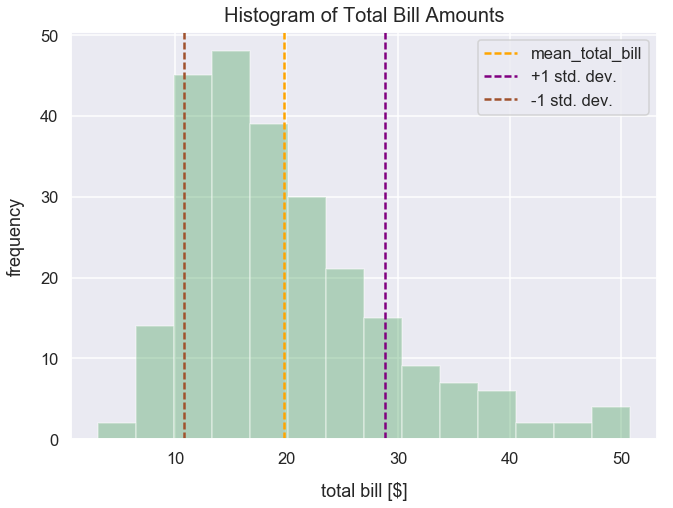

In [121]:
ax = sns.distplot(df_tips['total_bill'], kde=False, color='g')
ax.axes.set_title("Histogram of Total Bill Amounts", fontsize=20, y=1.01)
plt.ylabel("frequency", labelpad=15)
plt.xlabel("total bill [$]", labelpad=15)
plt.axvline(x=mean_total_bill, linestyle='--', linewidth=2.5, label='mean_total_bill', c='orange')
plt.axvline(x=(mean_total_bill+standard_deviation_total_bill), linestyle='--', linewidth=2.5, label='+1 std. dev.', c='purple')
plt.axvline(x=(mean_total_bill-standard_deviation_total_bill), linestyle='--', linewidth=2.5, label='-1 std. dev.', c='sienna')
plt.legend();

### Example 2: Tips Dataset Comparing Total Bill Standard Deviation Among Male and Female Servers

For each unique value in the `sex` column, let's see their mean `total_bill` value and standard deviation of their `total_bill` values. 

In [122]:
for gender in df_tips['sex'].unique():
    std_dev = round(df_tips[df_tips['sex']==gender]['total_bill'].std(), 2)
    mean = round(df_tips[df_tips['sex']==gender]['total_bill'].mean(), 2)
    print("Gender {0} has a mean total bill value of {1} and a standard deviation of {2}".format(gender, std_dev, mean))

Gender Female has a mean total bill value of 8.01 and a standard deviation of 18.06
Gender Male has a mean total bill value of 9.25 and a standard deviation of 20.74


Males have a slightly higher standard deviation than females. Below, I plot a histogram of `total_bill` values to compare males against females. It's slightly noticeable that males have a slightly larger standard deviation than females. 

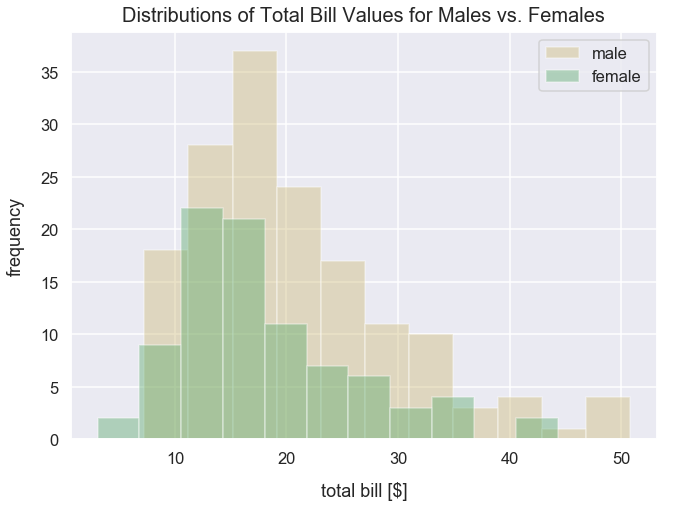

In [123]:
sns.distplot(df_tips.query("sex=='Male'")['total_bill'], kde=False, color='y', label='male')
sns.distplot(df_tips.query("sex=='Female'")['total_bill'], kde=False, color='g', label='female')
plt.xlabel("total bill [$]", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Distributions of Total Bill Values for Males vs. Females", y=1.01, fontsize=20)
plt.legend();

### Example 3: Compare Vastly Different Standard Deviation Values

Using the NumPy package's `random` module, we can call the `normal()` method to create a list of values with a normal distribution by setting the following arguments:

- `loc` as the mean of the distribution
- `scale` as the standard deviation of the distribution
- `size` as number of samples

In [124]:
np.random.seed(42) # seed random number generator with fixed value so we always get same values below
high_std_dev_values = list(np.random.normal(loc=100, scale=50, size=200))
low_std_dev_values = list(np.random.normal(loc=100, scale=10, size=200))

Both of the distributions below have a mean of 100.

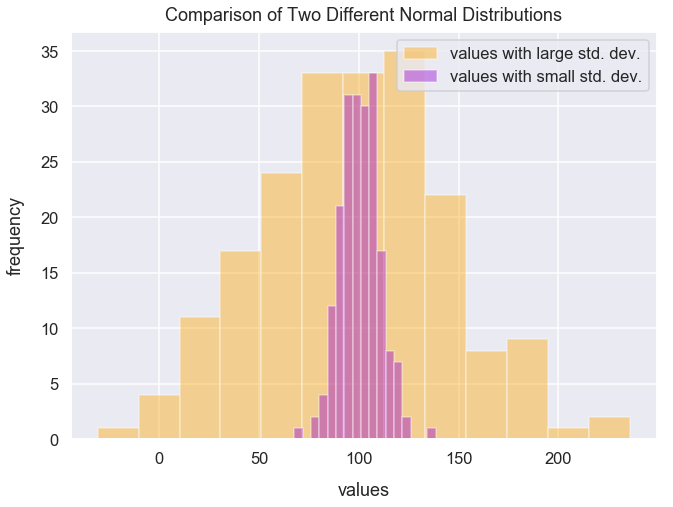

In [125]:
sns.distplot(high_std_dev_values, kde=False, color='orange', label='values with large std. dev.')
sns.distplot(low_std_dev_values, kde=False, color='darkviolet', label='values with small std. dev.')
plt.title("Comparison of Two Different Normal Distributions", y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.legend();

This histogram makes it evident that the <span style="color:orange">orange</span> values have a large standard deviation because there's a large spread of values from the mean as values extend to around -30 and 240. Hence the <span style="color:purple">purple</span> values have a smaller standard deviation because there's a minimal spread of values from the mean as values extend to just around 65 and 130.